In [209]:
### Software Product: Analysis, Specification, Project & Implementation
### 202501 - EAD - ADS 5A
### Atividade Contínua 01
### Aluno: Felippe Machoski de Souza
### Professor: Antonio de Oliveira Dias

# Introdução ao projeto Brasileirão 2024

# Neste projeto, teremos a oportunidade de mergulhar nos dados detalhados das partidas do Campeonato Brasileiro no ano de 2024.
# Ao explorar esses dados, nosso objetivo é obter insights que nos ajudem a compreender melhor como foi esse torneio tão amado pelos brasileiros.
# O dataset usado para este projeto pode ser encontrado no Kaggle (https://www.kaggle.com/datasets/fabioschirmann/brasileiro-2024-srie-a-dataset)
# Dentro do dataset temos informações como Data, Horário, Em casa (Equipe que jogou como mandante), Resultado, Visitante (Equipe que jogou como visitante.)Público e Local.
# Com base nesses datasets, responderemos as seguinte perguntas:
# Pergunta 1: Quais foram os times com os melhores desempenhos no campeonato?
# Pergunta 2: Quais foram os times com os melhores desempenhos em casa e o pior desempenho fora de casa?
# Pergunta 3: Quais foram os 5 jogos com o maior público?
# Pergunta 4: Quais foram os locais (estádios) com o maior público acumulado durante o campeonato?
# Pergunta 5: Quais foram os times com os melhores ataques e melhores defesas?
# Pergunta 6: Qual foi o time com o maior número de vitórias consecutivas?
# Pergunta 7: Qual foi o time que mais sofreu gols em jogos fora de casa?
# Pergunta 8: Qual foi o mês com o maior número de gols marcados?
# Pergunta 9: Quais foram os times que mais empataram no campeonato?
# Pergunta 10: Quais foram os confrontos mais desequilibrados do campeonato?

In [138]:
# 1 Importação de pacotes

In [39]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [40]:
# 2 Carregando Dados

In [41]:
# Carregando o dataset
df = pd.read_csv(r'C:\Users\Machoski\Documents\TCC\Brasileiro2024.csv')

# Exibindo o número de linhas e colunas
print(f"Brasileiro2024.csv tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Exibir as primeiras linhas do dataset
df.head()

Brasileiro2024.csv tem 328 linhas e 7 colunas.


,Data,Horário,Em casa,Resultado,Visitante,Público,Local
0,2024-04-13,18:30,Criciúma,1–1,Juventude,12.804,Estádio Heriberto Hülse
1,2024-04-13,18:30,Internacional,2–1,Bahia,19.103,Estádio José Pinheiro Borba
2,2024-04-14,16:00,Ath Paranaense,4–0,Cuiabá,21.388,Ligga Arena
3,2024-04-14,16:00,Vasco da Gama,2–1,Grêmio,17.722,Estádio Club de Regatas Vasco da Gama
4,2024-04-14,16:00,Corinthians,0–0,Atlético Mineiro,44.285,Neo Química Arena


In [42]:
# 3 Inspeção Inicial dos Dados

In [43]:
# Visualizar as primeiras linhas
print(df.head())

# Verificar informações gerais sobre o DataFrame
print(df.info())

# Verificar estatísticas descritivas
print(df.describe())

         Data Horário         Em casa Resultado         Visitante  Público  \
0  2024-04-13   18:30        Criciúma       1–1         Juventude   12.804   
1  2024-04-13   18:30   Internacional       2–1             Bahia   19.103   
2  2024-04-14   16:00  Ath Paranaense       4–0            Cuiabá   21.388   
3  2024-04-14   16:00   Vasco da Gama       2–1            Grêmio   17.722   
4  2024-04-14   16:00     Corinthians       0–0  Atlético Mineiro   44.285   

                                   Local  
0                Estádio Heriberto Hülse  
1            Estádio José Pinheiro Borba  
2                            Ligga Arena  
3  Estádio Club de Regatas Vasco da Gama  
4                      Neo Química Arena  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       328 non-null    object 
 1   Horário    328 non-null    object 
 2   Em c

In [44]:
# 4 Limpeza dos Dados

In [45]:
# Verificar dados faltantes por coluna
print("Dados faltantes por coluna:")
df.isnull().sum()

Dados faltantes por coluna:


Data           0
Horário        0
Em casa        0
Resultado      0
Visitante      0
Público      187
Local          0
dtype: int64

In [46]:
# Preenche os valores faltantes na coluna 'Público' com 0
df['Público'] = df['Público'].fillna(0)

# Verifica novamente a presença de valores faltantes
print(df.isnull().sum())

Data         0
Horário      0
Em casa      0
Resultado    0
Visitante    0
Público      0
Local        0
dtype: int64


In [47]:
# 5. Tratamento de Dados

In [48]:
## 5.1 Verificação e Correção de Valores Inconsistentes na Coluna 'Resultado'

# Verificar se há valores nulos na coluna 'Resultado'
print("Valores nulos na coluna 'Resultado':")
print(df['Resultado'].isnull().sum())

# Função para validar o formato do resultado
def validar_formato_resultado(resultado):
    try:
        # Divide o resultado no formato "X–Y"
        em_casa, visitante = resultado.split('–')
        # Tenta converter para inteiro
        int(em_casa)
        int(visitante)
        return True
    except:
        return False

Valores nulos na coluna 'Resultado':
0


In [49]:
# Aplicar a função para verificar o formato de todos os resultados
resultados_invalidos = df[~df['Resultado'].apply(validar_formato_resultado)]


In [50]:
# Exibir resultados inválidos (se houver)
if not resultados_invalidos.empty:
    print("Resultados com formato inválido:")
    print(resultados_invalidos)
else:
    print("Todos os resultados estão no formato correto (X–Y).")

Todos os resultados estão no formato correto (X–Y).


In [51]:
# Corrigir resultados inválidos (se necessário)
# Exemplo: Substituir resultados inválidos por "0–0" (empate)
df['Resultado'] = df['Resultado'].apply(lambda x: x if validar_formato_resultado(x) else '0–0')

In [52]:
# Verificar novamente após a correção
print("Valores corrigidos na coluna 'Resultado':")
print(df['Resultado'].unique())

Valores corrigidos na coluna 'Resultado':
['1–1' '2–1' '4–0' '0–0' '1–2' '3–2' '0–1' '2–2' '2–0' '1–0' '0–3' '5–1'
 '3–0' '0–4' '0–2' '3–1' '1–3' '1–6' '2–5' '5–0' '4–2' '4–1' '2–4' '1–4'
 '2–3' '5–2' '3–5']


In [53]:
### 5.2 Normalização dos Nomes dos Times e Locais

In [54]:
# Função para normalizar os nomes dos times e locais
def normalizar_nomes(nome):
    return nome.strip().title()  # Remove espaços extras e padroniza a capitalização

In [55]:
# Aplicar a normalização nas colunas 'Em casa', 'Visitante' e 'Local'
df['Em casa'] = df['Em casa'].apply(normalizar_nomes)
df['Visitante'] = df['Visitante'].apply(normalizar_nomes)
df['Local'] = df['Local'].apply(normalizar_nomes)

In [56]:
# Verificar os nomes únicos após a normalização
print("Nomes dos times (mandantes) após normalização:")
print(df['Em casa'].unique())

print("Nomes dos times (visitantes) após normalização:")
print(df['Visitante'].unique())

print("Nomes dos locais após normalização:")
print(df['Local'].unique())


Nomes dos times (mandantes) após normalização:
['Criciúma' 'Internacional' 'Ath Paranaense' 'Vasco Da Gama' 'Corinthians'
 'Atl Goianiense' 'Cruzeiro' 'Vitória' 'Fluminense' 'São Paulo' 'Grêmio'
 'Red Bull Bragantino' 'Juventude' 'Atlético Mineiro' 'Palmeiras'
 'Fortaleza' 'Bahia' 'Flamengo' 'Botafogo (Rj)' 'Cuiabá']
Nomes dos times (visitantes) após normalização:
['Juventude' 'Bahia' 'Cuiabá' 'Grêmio' 'Atlético Mineiro' 'Flamengo'
 'Botafogo (Rj)' 'Palmeiras' 'Red Bull Bragantino' 'Fortaleza'
 'Ath Paranaense' 'Vasco Da Gama' 'Corinthians' 'Criciúma' 'Internacional'
 'Cruzeiro' 'Fluminense' 'São Paulo' 'Atl Goianiense' 'Vitória']
Nomes dos locais após normalização:
['Estádio Heriberto Hülse' 'Estádio José Pinheiro Borba' 'Ligga Arena'
 'Estádio Club De Regatas Vasco Da Gama' 'Neo Química Arena'
 'Estádio Do Governo Do Estado De Goiás'
 'Estádio Governador Magalhães Pinto' 'Estádio Manoel Barradas'
 'Estadio Jornalista Mário Filho' 'Estádio Do Morumbi' 'Arena Do Grêmio'
 'Estádio Nabi 

In [57]:
### 5.3 Verificação de Duplicidades Após Normalização

# Verificar se há duplicidades nos nomes dos times
times_unicos = pd.concat([df['Em casa'], df['Visitante']]).unique()
print(f"Total de times únicos após normalização: {len(times_unicos)}")

# Verificar se há duplicidades nos nomes dos locais
locais_unicos = df['Local'].unique()
print(f"Total de locais únicos após normalização: {len(locais_unicos)}")

Total de times únicos após normalização: 20
Total de locais únicos após normalização: 31


In [58]:
# 6. Criação da Tabela de Classificação

In [59]:
# Função para calcular os pontos de cada time com base no resultado da partida
def calcular_pontos(row):
    try:
        # Divide o resultado no formato "X–Y"
        em_casa, visitante = row['Resultado'].split('–')
        em_casa, visitante = int(em_casa), int(visitante)
        
        # Atribui pontos com base no resultado
        if em_casa > visitante:
            return pd.Series([3, 0])  # Vitória para o time da casa
        elif em_casa < visitante:
            return pd.Series([0, 3])  # Vitória para o visitante
        else:
            return pd.Series([1, 1])  # Empate
    except Exception as e:
        print(f"Erro ao calcular pontos para a linha: {row}")
        return pd.Series([0, 0])  # Retorna 0 pontos em caso de erro

# Aplicando a função para calcular os pontos e criar novas colunas no DataFrame
df[['Pontos_Casa', 'Pontos_Visitante']] = df.apply(calcular_pontos, axis=1)

In [60]:
# Criar uma tabela de classificação inicial com todos os times
times = pd.concat([df['Em casa'], df['Visitante']]).unique()
tabela = pd.DataFrame({
    'Time': times,
    'Pontos': 0,
    'Jogos': 0,
    'V': 0,  # Vitórias
    'E': 0,  # Empates
    'D': 0,  # Derrotas
    'SG': 0,  # Saldo de Gols
    'Pontos_Casa': 0,  # Pontos em casa
    'Pontos_Visitante': 0  # Pontos fora de casa
})

In [61]:
def atualizar_tabela(row):
#Atualiza a tabela de classificação com base no resultado de uma partida.
    # Atualiza os dados do time da casa
    casa_idx = tabela[tabela['Time'] == row['Em casa']].index[0]
    tabela.at[casa_idx, 'Jogos'] += 1
    tabela.at[casa_idx, 'Pontos'] += row['Pontos_Casa']
    tabela.at[casa_idx, 'Pontos_Casa'] += row['Pontos_Casa']
    tabela.at[casa_idx, 'SG'] += int(row['Resultado'].split('–')[0]) - int(row['Resultado'].split('–')[1])
    if row['Pontos_Casa'] == 3:
        tabela.at[casa_idx, 'V'] += 1
    elif row['Pontos_Casa'] == 1:
        tabela.at[casa_idx, 'E'] += 1
    else:
        tabela.at[casa_idx, 'D'] += 1

    # Atualiza os dados do time visitante
    visitante_idx = tabela[tabela['Time'] == row['Visitante']].index[0]
    tabela.at[visitante_idx, 'Jogos'] += 1
    tabela.at[visitante_idx, 'Pontos'] += row['Pontos_Visitante']
    tabela.at[visitante_idx, 'Pontos_Visitante'] += row['Pontos_Visitante']
    tabela.at[visitante_idx, 'SG'] += int(row['Resultado'].split('–')[1]) - int(row['Resultado'].split('–')[0])
    if row['Pontos_Visitante'] == 3:
        tabela.at[visitante_idx, 'V'] += 1
    elif row['Pontos_Visitante'] == 1:
        tabela.at[visitante_idx, 'E'] += 1
    else:
        tabela.at[visitante_idx, 'D'] += 1

# Aplicando a função para atualizar a tabela de classificação
df.apply(atualizar_tabela, axis=1)

# Ordenando a tabela de classificação por pontos e saldo de gols
tabela = tabela.sort_values(by=['Pontos', 'SG'], ascending=False)

In [62]:
# 7. Criando uma Tabela Interativa com Plotly

In [63]:
# Criando uma tabela interativa para exibir a classificação
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(tabela.columns),  # Cabeçalho da tabela
        fill_color='navy',  # Cor de fundo do cabeçalho
        font=dict(color='white', size=14, family='Arial'),  # Estilo da fonte do cabeçalho
        align='center',  # Alinhamento do texto do cabeçalho
        line=dict(color='black', width=1)  # Bordas do cabeçalho
    ),
    cells=dict(
        values=[tabela[col] for col in tabela.columns],  # Valores das células
        fill_color=[  # Gradiente de cores para as colunas numéricas
            ['rgb(220, 240, 255)' if col == 'Time' else  # Cor fixa para a coluna 'Time'
             f'rgba(173, 216, 230, {0.2 + 0.8 * (val - tabela[col].min()) / (tabela[col].max() - tabela[col].min())})'
             for val in tabela[col]] for col in tabela.columns],
        font=dict(size=12, family='Arial'),  # Estilo da fonte das células
        align='center',  # Alinhamento do texto
        height=30,  # Altura das células
        line=dict(color='black', width=1)  # Bordas das células
    )
)])

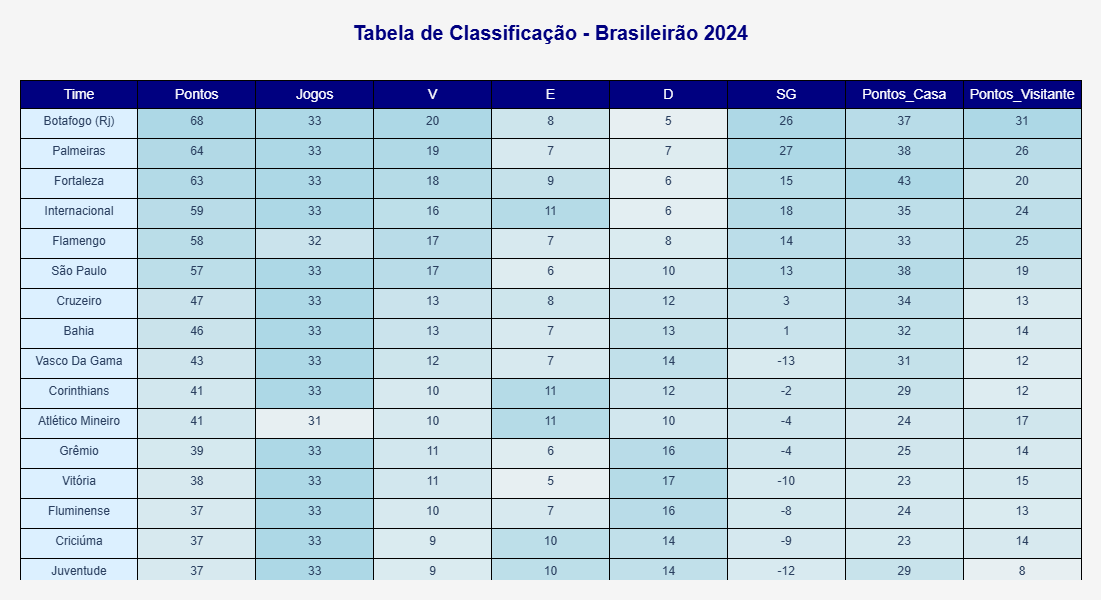

In [64]:
# Ajustando o layout da tabela
fig.update_layout(
    title=dict(
        text="<b>Tabela de Classificação - Brasileirão 2024</b>",  # Título em negrito
        x=0.5,  # Centralizar o título
        font=dict(size=20, family='Arial', color='navy')  # Estilo da fonte do título
    ),
    margin=dict(l=20, r=20, t=80, b=20),  # Margens
    height=600,  # Altura da tabela
    paper_bgcolor='rgba(245, 245, 245, 1)',  # Cor de fundo do layout
    plot_bgcolor='rgba(255, 255, 255, 1)'  # Cor de fundo da tabela
)

# Exibindo a tabela interativa
fig.show()

In [65]:
# 8. Gráficos Interativos

Top 5 times com melhor desempenho geral:
             Time  Pontos  SG   V   E  D
18  Botafogo (Rj)      68  26  20   8  5
14      Palmeiras      64  27  19   7  7
15      Fortaleza      63  15  18   9  6
1   Internacional      59  18  16  11  6
17       Flamengo      58  14  17   7  8


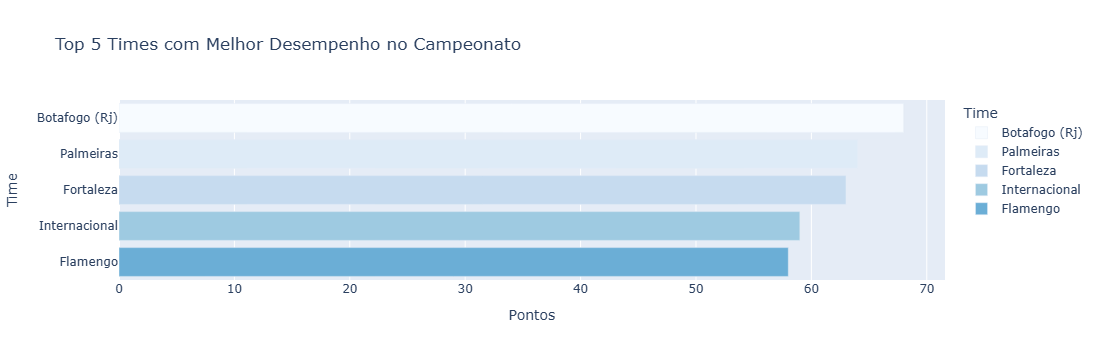

In [66]:
# Pergunta 1: Quais foram os times com os melhores desempenhos no campeonato?

# Ordenar a tabela de classificação por pontos e saldo de gols
tabela = tabela.sort_values(by=['Pontos', 'SG'], ascending=False)

# Exibir os 5 melhores times
top_5_times = tabela.head(5)
print("Top 5 times com melhor desempenho geral:")
print(top_5_times[['Time', 'Pontos', 'SG', 'V', 'E', 'D']])

# Visualização
fig = px.bar(top_5_times, x='Pontos', y='Time', 
             title='Top 5 Times com Melhor Desempenho no Campeonato',
             labels={'Pontos': 'Pontos', 'Time': 'Time'},
             color='Time', color_discrete_sequence=px.colors.sequential.Blues)
fig.show()

Time com melhor desempenho em casa: Fortaleza com 43 pontos.
Time com pior desempenho fora de casa: Juventude com 8 pontos.


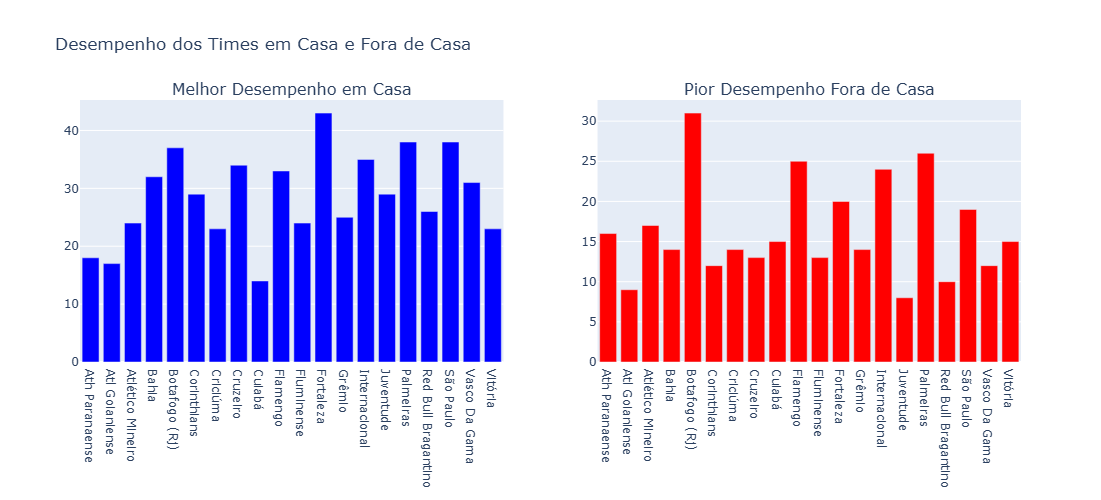

In [67]:
# Pergunta 2: Quais foram os times com os melhores desempenhos em casa e o pior desempenho fora de casa?

# Calcular pontos em casa e fora de casa para cada time
pontos_em_casa = df.groupby('Em casa')['Pontos_Casa'].sum()
pontos_fora_de_casa = df.groupby('Visitante')['Pontos_Visitante'].sum()

# Juntar os dados em um único DataFrame
desempenho_times = pd.DataFrame({
    'Time': pontos_em_casa.index,
    'Pontos_Em_Casa': pontos_em_casa.values,
    'Pontos_Fora_de_Casa': pontos_fora_de_casa.values
})

# Calcular a diferença entre desempenho em casa e fora de casa
desempenho_times['Diferença'] = desempenho_times['Pontos_Em_Casa'] - desempenho_times['Pontos_Fora_de_Casa']

# Encontrar o time com o melhor desempenho em casa
melhor_em_casa = desempenho_times.loc[desempenho_times['Pontos_Em_Casa'].idxmax()]
print(f"Time com melhor desempenho em casa: {melhor_em_casa['Time']} com {melhor_em_casa['Pontos_Em_Casa']} pontos.")

# Encontrar o time com o pior desempenho fora de casa
pior_fora_de_casa = desempenho_times.loc[desempenho_times['Pontos_Fora_de_Casa'].idxmin()]
print(f"Time com pior desempenho fora de casa: {pior_fora_de_casa['Time']} com {pior_fora_de_casa['Pontos_Fora_de_Casa']} pontos.")

# Visualização: Gráficos de barras lado a lado
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Melhor Desempenho em Casa', 'Pior Desempenho Fora de Casa'))

# Gráfico 1: Melhor desempenho em casa
fig.add_trace(
    go.Bar(x=desempenho_times['Time'], y=desempenho_times['Pontos_Em_Casa'], 
           name='Pontos em Casa', marker_color='blue'),
    row=1, col=1
)

# Gráfico 2: Pior desempenho fora de casa
fig.add_trace(
    go.Bar(x=desempenho_times['Time'], y=desempenho_times['Pontos_Fora_de_Casa'], 
           name='Pontos Fora de Casa', marker_color='red'),
    row=1, col=2
)

# Ajustar layout
fig.update_layout(
    title_text="Desempenho dos Times em Casa e Fora de Casa",
    showlegend=False,
    height=500,
    width=1000
)

# Exibir gráfico
fig.show()

Top 5 confrontos com maior público:
                 Confronto  Público
 Vasco Da Gama vs Flamengo   62.228
Flamengo vs Atl Goianiense   61.883
    Fluminense vs Flamengo   57.098
   Flamengo vs Corinthians   56.829
    São Paulo vs Palmeiras   55.694


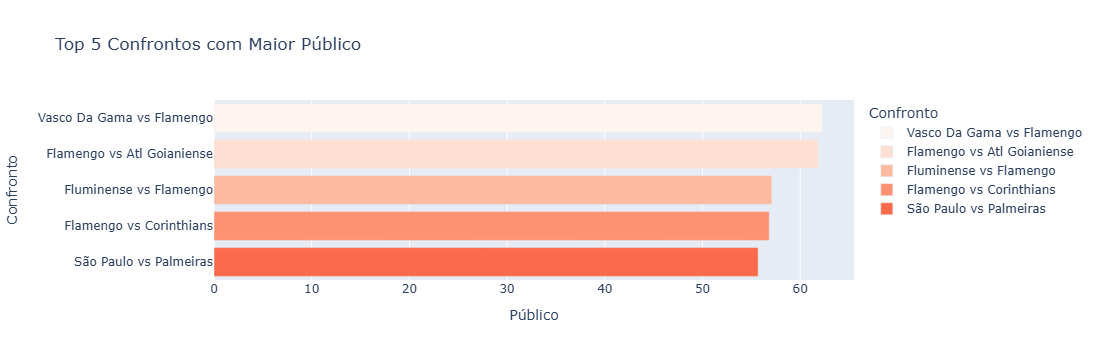

In [68]:
# Pergunta 3: Quais foram os 5 jogos com o maior público?

# Criar coluna de confronto
df['Confronto'] = df['Em casa'] + ' vs ' + df['Visitante']

# Agrupar por confronto e somar o público
publico_por_confronto = df.groupby('Confronto')['Público'].sum().nlargest(5)

# Converter a série em um DataFrame para exibição
publico_por_confronto_df = publico_por_confronto.reset_index()
publico_por_confronto_df.columns = ['Confronto', 'Público']

# Exibir os 5 confrontos com maior público
print("Top 5 confrontos com maior público:")
print(publico_por_confronto_df.to_string(index=False))  # Usar to_string para remover o índice

# Visualização
fig = px.bar(publico_por_confronto_df, x='Público', y='Confronto', 
             title='Top 5 Confrontos com Maior Público',
             labels={'Público': 'Público', 'Confronto': 'Confronto'},
             color='Confronto', color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

Top 5 estádios com maior público acumulado:
                         Local  Público Acumulado
Estadio Jornalista Mário Filho            594.627
             Neo Química Arena            389.170
            Estádio Do Morumbi            311.394
     Itaipava Arena Fonte Nova            288.272
                     Arena Mrv            226.053


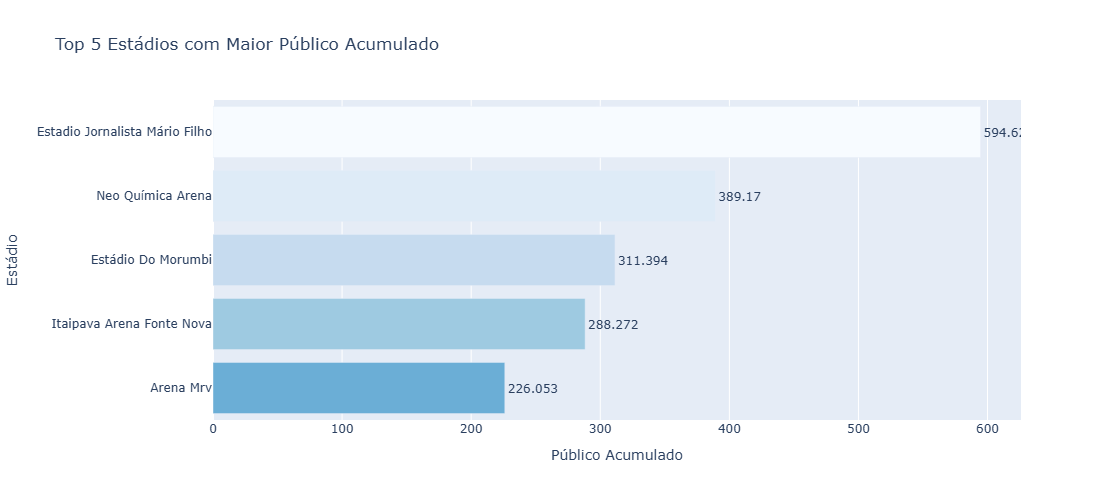

In [69]:
# Pergunta 4: Quais foram os locais (estádios) com o maior público acumulado durante o campeonato?

# Agrupar os dados por local e somar o público
publico_por_local = df.groupby('Local')['Público'].sum().nlargest(5)

# Converter a série em um DataFrame para exibição
publico_por_local_df = publico_por_local.reset_index()
publico_por_local_df.columns = ['Local', 'Público Acumulado']

# Exibir os 5 estádios com maior público acumulado
print("Top 5 estádios com maior público acumulado:")
print(publico_por_local_df.to_string(index=False))  # Usar to_string para remover o índice

# Visualização: Gráfico de barras
import plotly.express as px

# Gráfico de barras
fig = px.bar(publico_por_local_df, x='Público Acumulado', y='Local', 
             title='Top 5 Estádios com Maior Público Acumulado',
             labels={'Público Acumulado': 'Público Acumulado', 'Local': 'Estádio'},
             color='Local', color_discrete_sequence=px.colors.sequential.Blues)

# Adicionar rótulos de valores
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Ajustar layout
fig.update_layout(
    xaxis_title="Público Acumulado",
    yaxis_title="Estádio",
    showlegend=False,
    height=500,
    width=800
)

# Exibir gráfico
fig.show()

Top 5 times com melhor ataque:
         Time  Gols Marcados
    Palmeiras             54
Botafogo (Rj)             52
     Flamengo             51
    Fortaleza             47
    São Paulo             47

Top 5 times com melhor defesa:
         Time  Gols Sofridos
Botafogo (Rj)             26
    Palmeiras             27
Internacional             28
    Fortaleza             32
    São Paulo             34


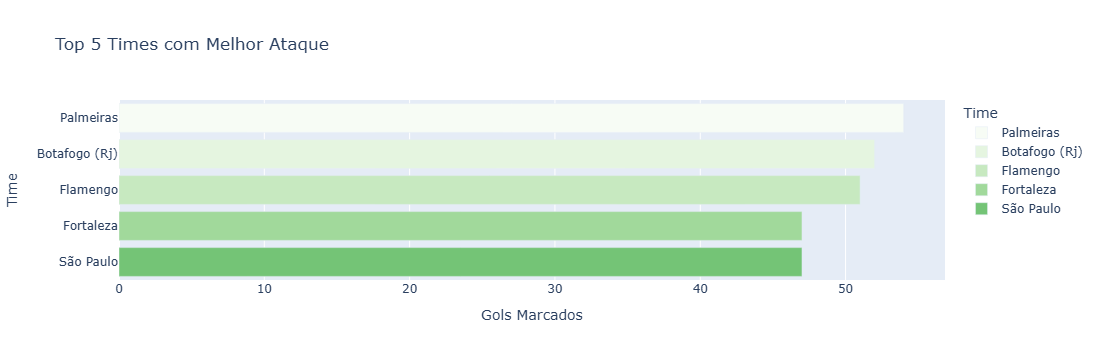

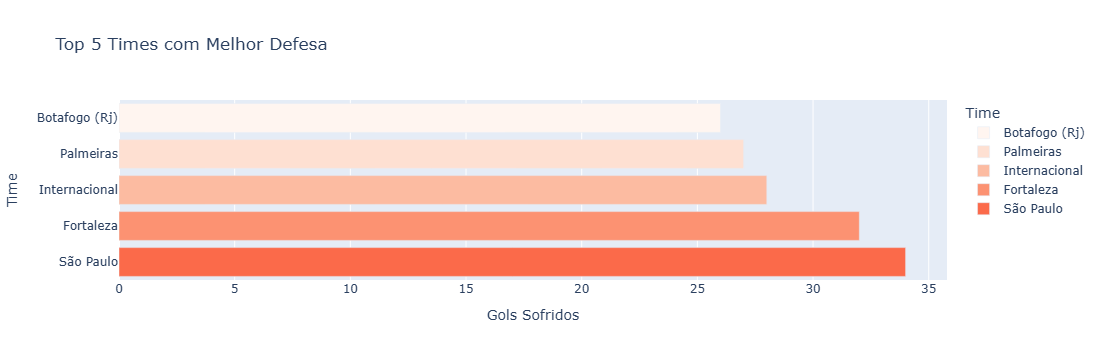

In [199]:
# Pergunta 5: Quais foram os times com os melhores ataques e melhores defesas?

# Calcular gols marcados (ataque) e gols sofridos (defesa) por time
df['Gols_Casa'] = df['Resultado'].str.split('–').str[0].astype(int)
df['Gols_Visitante'] = df['Resultado'].str.split('–').str[1].astype(int)

# Ataque: Gols marcados em casa + gols marcados fora
gols_em_casa = df.groupby('Em casa')['Gols_Casa'].sum()
gols_fora = df.groupby('Visitante')['Gols_Visitante'].sum()
gols_totais = gols_em_casa.add(gols_fora, fill_value=0)

# Defesa: Gols sofridos em casa + gols sofridos fora
gols_sofridos_em_casa = df.groupby('Em casa')['Gols_Visitante'].sum()
gols_sofridos_fora = df.groupby('Visitante')['Gols_Casa'].sum()
gols_sofridos_totais = gols_sofridos_em_casa.add(gols_sofridos_fora, fill_value=0)

# Top 5 melhores ataques
melhores_5_ataques = gols_totais.nlargest(5).reset_index()
melhores_5_ataques.columns = ['Time', 'Gols Marcados']

# Top 5 melhores defesas (menos gols sofridos)
melhores_5_defesas = gols_sofridos_totais.nsmallest(5).reset_index()
melhores_5_defesas.columns = ['Time', 'Gols Sofridos']

# Exibir os 5 times com melhor ataque
print("Top 5 times com melhor ataque:")
print(melhores_5_ataques.to_string(index=False))  # Remover índice e dtype

# Exibir os 5 times com melhor defesa
print("\nTop 5 times com melhor defesa:")
print(melhores_5_defesas.to_string(index=False))  # Remover índice e dtype

# Visualização
fig1 = px.bar(melhores_5_ataques, x='Gols Marcados', y='Time', 
              title='Top 5 Times com Melhor Ataque',
              labels={'Gols Marcados': 'Gols Marcados', 'Time': 'Time'},
              color='Time', color_discrete_sequence=px.colors.sequential.Greens)
fig1.show()

fig2 = px.bar(melhores_5_defesas, x='Gols Sofridos', y='Time', 
              title='Top 5 Times com Melhor Defesa',
              labels={'Gols Sofridos': 'Gols Sofridos', 'Time': 'Time'},
              color='Time', color_discrete_sequence=px.colors.sequential.Reds)
fig2.show()

In [76]:
# Pergunta 6: Qual foi o time com o maior número de vitórias consecutivas?

# Função para calcular vitórias consecutivas
def calcular_vitorias_consecutivas(time, df):

    resultados = []
    for _, row in df.iterrows():
        if row['Em casa'] == time:
            if row['Pontos_Casa'] == 3:
                resultados.append('V')
            else:
                resultados.append('D/E')
        elif row['Visitante'] == time:
            if row['Pontos_Visitante'] == 3:
                resultados.append('V')
            else:
                resultados.append('D/E')
    
    max_vitorias = 0
    contador = 0
    for resultado in resultados:
        if resultado == 'V':
            contador += 1
            if contador > max_vitorias:
                max_vitorias = contador
        else:
            contador = 0
    return max_vitorias

# Calcular vitórias consecutivas para cada time
times = pd.concat([df['Em casa'], df['Visitante']]).unique()
vitorias_consecutivas = {time: calcular_vitorias_consecutivas(time, df) for time in times}

# Exibir o time com mais vitórias consecutivas
time_max_vitorias = max(vitorias_consecutivas, key=vitorias_consecutivas.get)
print(f"O time com mais vitórias consecutivas foi {time_max_vitorias} com {vitorias_consecutivas[time_max_vitorias]} vitórias seguidas.")

O time com mais vitórias consecutivas foi Palmeiras com 6 vitórias seguidas.


Top 5 times que mais sofreram gols fora de casa:
          Time  Gols Sofridos Fora de Casa
         Bahia                          30
     Juventude                          30
      Criciúma                          29
Atl Goianiense                          28
 Vasco Da Gama                          28


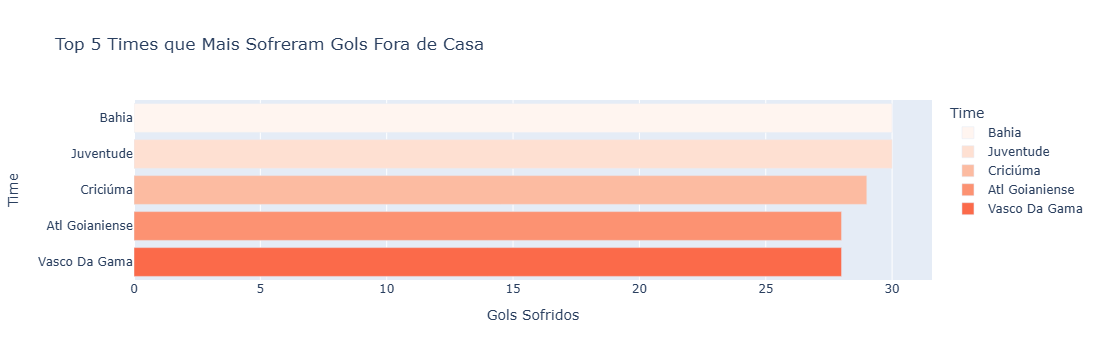

In [194]:
# Pergunta 7: Qual foi o time que mais sofreu gols em jogos fora de casa?

# Calcular gols sofridos fora de casa
gols_sofridos_fora = df.groupby('Visitante')['Gols_Casa'].sum()

# Exibir os 5 times que mais sofreram gols fora de casa
top_5_sofridos_fora = gols_sofridos_fora.nlargest(5).reset_index()
top_5_sofridos_fora.columns = ['Time', 'Gols Sofridos Fora de Casa']

print("Top 5 times que mais sofreram gols fora de casa:")
print(top_5_sofridos_fora.to_string(index=False))  # Usar to_string para remover o índice

# Visualização
fig = px.bar(top_5_sofridos_fora, x='Gols Sofridos Fora de Casa', y='Time', 
             title='Top 5 Times que Mais Sofreram Gols Fora de Casa',
             labels={'Gols Sofridos Fora de Casa': 'Gols Sofridos', 'Time': 'Time'},
             color='Time', color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

O mês com mais gols foi o mês 6 com 180 gols.


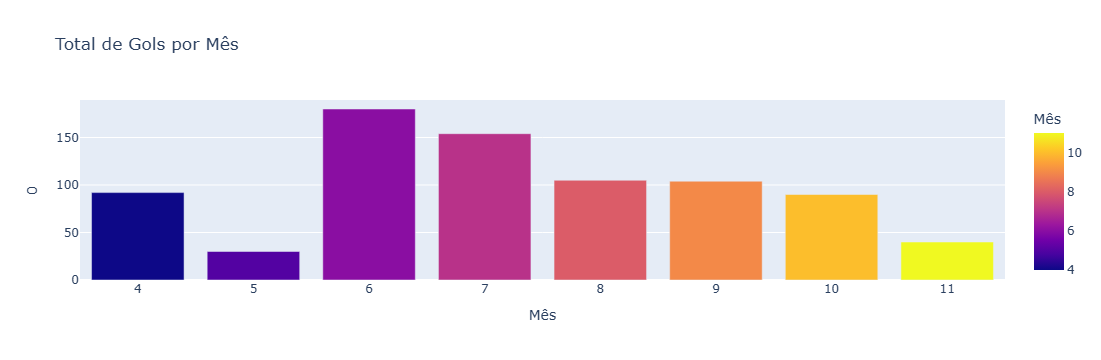

In [73]:
# Pergunta 8: Qual foi o mês com o maior número de gols marcados?

# Extrair o mês da coluna 'Data'
df['Data'] = pd.to_datetime(df['Data'])
df['Mês'] = df['Data'].dt.month

# Criar as colunas 'Gols_Casa' e 'Gols_Visitante' a partir da coluna 'Resultado'
df['Gols_Casa'] = df['Resultado'].str.split('–').str[0].astype(int)  # Extrai os gols do time da casa
df['Gols_Visitante'] = df['Resultado'].str.split('–').str[1].astype(int)  # Extrai os gols do visitante

# Calcular o total de gols por mês
gols_por_mes = df.groupby('Mês')[['Gols_Casa', 'Gols_Visitante']].sum().sum(axis=1)

# Exibir o mês com mais gols
mes_max_gols = gols_por_mes.idxmax()
print(f"O mês com mais gols foi o mês {mes_max_gols} com {gols_por_mes.max()} gols.")

# Visualização
fig = px.bar(
    gols_por_mes.reset_index(),  # Resetar o índice para usar 'Mês' como coluna
    x='Mês',  # Eixo X: Mês
    y=0,      # Eixo Y: Total de gols (o resultado do groupby é uma série, e o valor está na coluna 0)
    title='Total de Gols por Mês',
    labels={'x': 'Mês', 'y': 'Total de Gols'},
    color='Mês',  # Colorir as barras pelo mês
    color_discrete_sequence=px.colors.sequential.Blues  # Usar uma sequência de cores
)
fig.show()

Top 5 times que mais empataram:
               Time  Número de Empates
Red Bull Bragantino                 12
   Atlético Mineiro                 11
        Corinthians                 11
             Cuiabá                 11
      Internacional                 11


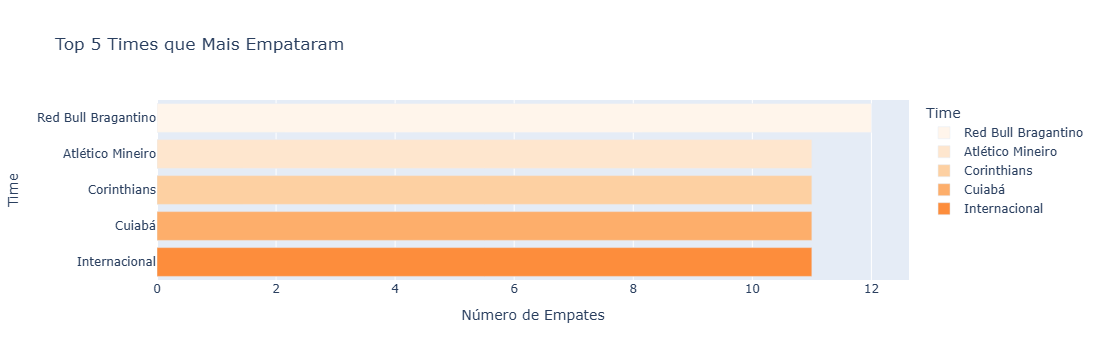

In [74]:
# Pergunta 9: Quais foram os times que mais empataram no campeonato?

# Calcular o número de empates para cada time
empates_casa = df[df['Pontos_Casa'] == 1].groupby('Em casa').size()
empates_fora = df[df['Pontos_Visitante'] == 1].groupby('Visitante').size()
empates_totais = empates_casa.add(empates_fora, fill_value=0)

# Exibir os 5 times que mais empataram
top_5_empates = empates_totais.nlargest(5).reset_index()
top_5_empates.columns = ['Time', 'Número de Empates']

print("Top 5 times que mais empataram:")
print(top_5_empates.to_string(index=False))  # Usar to_string para remover o índice

# Visualização
fig = px.bar(top_5_empates, x='Número de Empates', y='Time', 
             title='Top 5 Times que Mais Empataram',
             labels={'Número de Empates': 'Número de Empates', 'Time': 'Time'},
             color='Time', color_discrete_sequence=px.colors.sequential.Oranges)
fig.show()

Top 5 jogos mais desequilibrados:
                 Confronto Resultado  Diferença_Gols
 Vasco Da Gama vs Flamengo       1–6               5
       Palmeiras vs Cuiabá       5–0               5
       Cuiabá vs Fortaleza       5–0               5
     Palmeiras vs Criciúma       5–0               5
Botafogo (Rj) vs Juventude       5–1               4


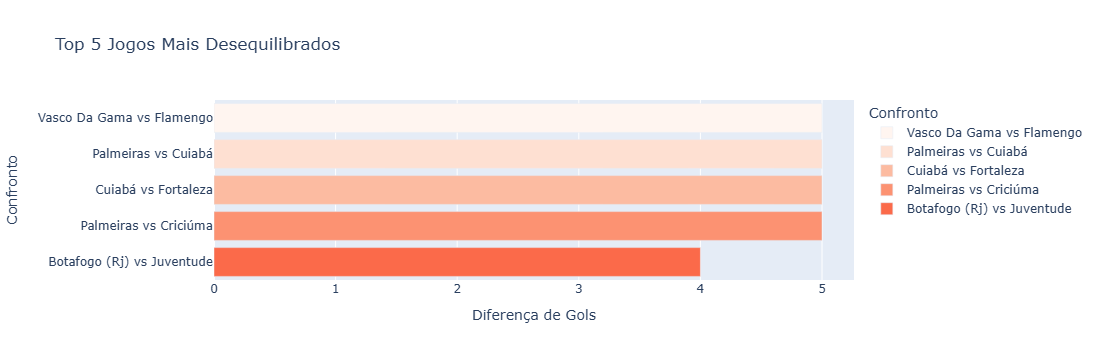

In [75]:
# Pergunta 10: Quais foram os confrontos mais desequilibrados do campeonato?

# Calcular a diferença de gols em cada jogo
df['Diferença_Gols'] = abs(df['Gols_Casa'] - df['Gols_Visitante'])

# Encontrar os jogos com a maior diferença de gols
jogos_desequilibrados = df.sort_values(by='Diferença_Gols', ascending=False).head(5)
jogos_desequilibrados['Confronto'] = jogos_desequilibrados['Em casa'] + ' vs ' + jogos_desequilibrados['Visitante']

# Exibir os 5 jogos mais desequilibrados
print("Top 5 jogos mais desequilibrados:")
print(jogos_desequilibrados[['Confronto', 'Resultado', 'Diferença_Gols']].to_string(index=False))

# Visualização
fig = px.bar(jogos_desequilibrados, x='Diferença_Gols', y='Confronto', 
             title='Top 5 Jogos Mais Desequilibrados',
             labels={'Diferença_Gols': 'Diferença de Gols', 'Confronto': 'Confronto'},
             color='Confronto', color_discrete_sequence=px.colors.sequential.Reds)
fig.show()
